In [250]:
import shap

from chessplainer.wrapper import StockfishWrapper, ChessShap
import chess

In [251]:
import matplotlib
import matplotlib.colors as colors

True


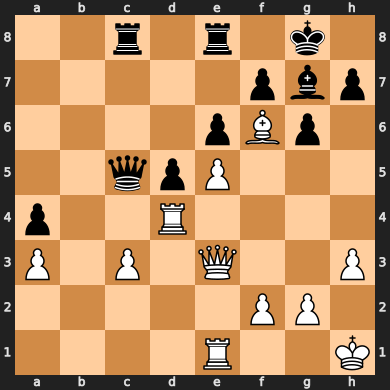

In [252]:
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1")  # black to move
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 1")  # white to move
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")
# board = chess.Board("5k2/4ppp1/8/8/2K5/5R2/8/8 w - - 0 1")
board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1")

# board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
# board = chess.Board("Q7/4pkp1/3rp1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
#
# board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5P2/5R2/6q1 w - - 0 1")
#
# board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1")




# board = chess.Board("Q7/4pkp1/4p1p1/8/2K5/5R2/8/8 w - - 0 1")
board = chess.Board("2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1") # reddit

# board = chess.Board("5K2/8/8/P3pkp1/p6p/4P2P/1nN5/8 w - - 0 1")
# board = chess.Board("8/6q1/8/8/8/5k2/8/4K3 b - - 0 1")  # black to mate
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")  # white to mate
# board = chess.Board("3q1k2/8/8/8/8/8/2R5/2K5 w - - 0 1")
# board = chess.Board("3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1")
# board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1")
# board = chess.Board()
print(board.turn)
board

In [253]:
engine = StockfishWrapper(predict_analyze_time=0.01, output_improvement_delta=True)

In [254]:
# engine.engine.analyse(board, limit=chess.engine.Limit(0.1))

In [255]:
# board.turn = chess.BLACK      #
# board.is_mate()

In [256]:
# chess.engine.PovScore(100, not board.turn).black()

In [257]:
engine.fit([board])

,path,None
,fit_analyze_time,1
,predict_analyze_time,0.01
,output_improvement_delta,True


In [258]:
engine.base_score_

-0.16

In [259]:
# engine.base_eval_.relative.cp

In [260]:
import shap

In [261]:
chesshap = ChessShap(board, engine, exp=shap.KernelExplainer)
print(chesshap.engine.base_score_)

-0.16


In [262]:
chesshap.shap_values(1000)
# chesshap.shap_values(10)

array([[ 35.73386088,   0.        ,   0.        ,   0.        ,
          0.        ,  65.42182096,   0.        , -11.35533217,
         32.54002184, -41.83140397,   0.        ,   0.        ,
          0.        ,  29.76400032, -23.40341116,   0.        ,
        -23.00478585,   0.        , -34.08542246, -29.85934839]])

True
True
False
100.0


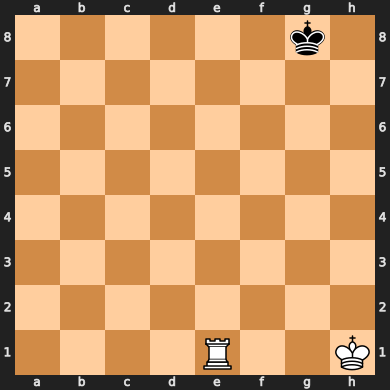

In [263]:
i = 0
print(chesshap.engine.base_board_.turn)
print(chesshap.engine.predict_boards_[i].is_valid())
print(chesshap.engine.predict_boards_[i].is_checkmate())
print(chesshap.engine.predict_evals_[i])
# print(chesshap.engine.multipliers_[i])
chesshap.engine.predict_boards_[i]


In [264]:
chesshap.shap_values_.sum() + chesshap.explainer_.expected_value - chesshap.engine.base_score_

np.float64(0.0799999999999946)

In [265]:
chesshap.explainer_.expected_value

0.0

In [266]:
chesshap.engine.base_score_

-0.16

In [267]:
chesshap.shap_values_.sum()

np.float64(-0.0800000000000054)

In [268]:
chesshap.shap_values_

array([[ 35.73386088,   0.        ,   0.        ,   0.        ,
          0.        ,  65.42182096,   0.        , -11.35533217,
         32.54002184, -41.83140397,   0.        ,   0.        ,
          0.        ,  29.76400032, -23.40341116,   0.        ,
        -23.00478585,   0.        , -34.08542246, -29.85934839]])

In [269]:
chesshap.explainer_.expected_value

0.0

In [270]:
chesshap.shap_values_

array([[ 35.73386088,   0.        ,   0.        ,   0.        ,
          0.        ,  65.42182096,   0.        , -11.35533217,
         32.54002184, -41.83140397,   0.        ,   0.        ,
          0.        ,  29.76400032, -23.40341116,   0.        ,
        -23.00478585,   0.        , -34.08542246, -29.85934839]])

In [271]:
chesshap.pieces

{4: Piece.from_symbol('R'),
 13: Piece.from_symbol('P'),
 14: Piece.from_symbol('P'),
 16: Piece.from_symbol('P'),
 18: Piece.from_symbol('P'),
 20: Piece.from_symbol('Q'),
 23: Piece.from_symbol('P'),
 24: Piece.from_symbol('p'),
 27: Piece.from_symbol('R'),
 34: Piece.from_symbol('q'),
 35: Piece.from_symbol('p'),
 36: Piece.from_symbol('P'),
 44: Piece.from_symbol('p'),
 45: Piece.from_symbol('B'),
 46: Piece.from_symbol('p'),
 53: Piece.from_symbol('p'),
 54: Piece.from_symbol('b'),
 55: Piece.from_symbol('p'),
 58: Piece.from_symbol('r'),
 60: Piece.from_symbol('r')}

In [272]:
chesshap.explainer_.expected_value, chesshap.engine.base_score_

(0.0, -0.16)

In [273]:
# chesshap.plot()

In [274]:
# chesshap.plot(absolute=False)

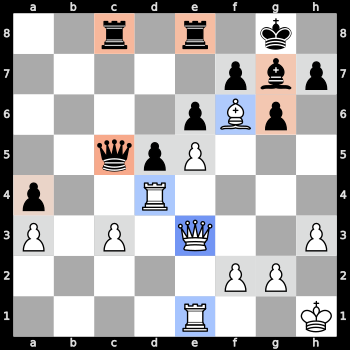

In [275]:
chesshap.plot2(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

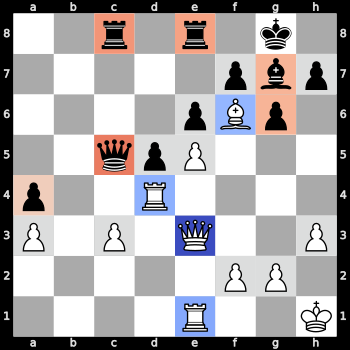

In [276]:
chesshap.plot2(local_range=True, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

In [297]:
import chess
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Example input
board_dict = chesshap.pieces
# Corresponding scores (example)
# scores = chesshap.shap_values_

scores = {
    k: v for k, v in zip(board_dict.keys(), chesshap.shap_values_.ravel())
}

# Colormap normalization
vmin = min(scores.values())
vmax = max(scores.values())
absmax = max(abs(vmin), abs(vmax))
norm = colors.TwoSlopeNorm(vmin=-absmax, vcenter=0, vmax=absmax)
cmap = cm.get_cmap("coolwarm")

# Get hex color from colormap
def score_to_hex(score):
    rgba = cmap(norm(score))
    r, g, b = [int(255*x) for x in rgba[:3]]
    return f"{r:02x}{g:02x}{b:02x}"


def rgba_to_tikz_rgb(rgba):
    r, g, b = [int(255 * x) for x in rgba[:3]]
    return f"{{rgb:red,{r/255:.3f};green,{g/255:.3f};blue,{b/255:.3f}}}"

# FEN string (example; replace with your actual FEN)
fen = board.fen()

# Generate LaTeX markfield commands
highlight_cmds = []
for square, score in scores.items():
    sq_name = chess.square_name(square)
    hexcolor = score_to_hex(score)
    highlight_cmds.append(f"colorbackfield={sq_name},color=#[{hexcolor}],opacity=0.8,pgfstyle=color")

# Merge all highlight commands
highlight_str = ",\n            ".join(highlight_cmds)

# Final LaTeX code
latex_code = f"""\\documentclass{{article}}
\\usepackage{{xskak}}
\\begin{{document}}
\\newgame
\\chessboard[setfen={fen},
            {highlight_str}]
\\end{{document}}"""

print(latex_code)


\documentclass{article}
\usepackage{xskak}
\begin{document}
\newgame
\chessboard[setfen=2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1,
            colorbackfield=e1,color=#[f19072],opacity=0.8,pgfstyle=color,
            colorbackfield=f2,color=#[dddcdb],opacity=0.8,pgfstyle=color,
            colorbackfield=g2,color=#[dddcdb],opacity=0.8,pgfstyle=color,
            colorbackfield=a3,color=#[dddcdb],opacity=0.8,pgfstyle=color,
            colorbackfield=c3,color=#[dddcdb],opacity=0.8,pgfstyle=color,
            colorbackfield=e3,color=#[b30326],opacity=0.8,pgfstyle=color,
            colorbackfield=h3,color=#[dddcdb],opacity=0.8,pgfstyle=color,
            colorbackfield=a4,color=#[c3d5f2],opacity=0.8,pgfstyle=color,
            colorbackfield=d4,color=#[f49a7b],opacity=0.8,pgfstyle=color,
            colorbackfield=c5,color=#[7497f5],opacity=0.8,pgfstyle=color,
            colorbackfield=d5,color=#[dddcdb],opacity=0.8,pgfstyle=color,
            colorbackfield=e5,color=#[d

/var/folders/kj/v66zvn217x31k6lx63lt02q40000gn/T/ipykernel_33342/504933943.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")


In [303]:
import chess
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Example input
board_dict = chesshap.pieces
# Corresponding scores (example)
# scores = chesshap.shap_values_

scores = {
    k: v for k, v in zip(board_dict.keys(), chesshap.shap_values_.ravel())
}

# Normalize for colormap
vmin = min(scores.values())
vmax = max(scores.values())
absmax = max(abs(vmin), abs(vmax))
norm = colors.TwoSlopeNorm(vmin=-absmax, vcenter=0, vmax=absmax)
cmap = cm.get_cmap("RdBu")

# Convert matplotlib RGBA to TikZ-compatible RGB format
def rgba_to_tikz_rgb(rgba):
    r, g, b = [int(255 * x) for x in rgba[:3]]
    return f"{{rgb:red,{r/255:.3f};green,{g/255:.3f};blue,{b/255:.3f}}}"

# Generate LaTeX highlight lines
highlight_lines = []
for square, score in scores.items():
    square_name = chess.square_name(square)
    rgba = cmap(norm(score))
    tikz_color = rgba_to_tikz_rgb(rgba)
    highlight_lines.append(f"  color={tikz_color},\n  colorbackfield={{{square_name}}},")

highlight_block = "\n".join(highlight_lines).rstrip(',')

# Final LaTeX Code
latex_code = f"""
\\documentclass{{article}}
\\usepackage{{xskak}}
\\usepackage{{chessboard}}
\\usepackage{{pgf}}
\\usepackage{{xcolor}}

\\begin{{document}}
\\newgame
\\chessboard[
  setfen={fen},
  pgfstyle=color,
  opacity=0.5,
{highlight_block}
]
\\end{{document}}
"""

print(latex_code)



\documentclass{article}
\usepackage{xskak}
\usepackage{chessboard}
\usepackage{pgf}
\usepackage{xcolor}

\begin{document}
\newgame
\chessboard[
  setfen=2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1,
  pgfstyle=color,
  opacity=0.5,
  color={rgb:red,0.345;green,0.627;blue,0.792},
  colorbackfield={e1},
  color={rgb:red,0.965;green,0.965;blue,0.965},
  colorbackfield={f2},
  color={rgb:red,0.965;green,0.965;blue,0.965},
  colorbackfield={g2},
  color={rgb:red,0.965;green,0.965;blue,0.965},
  colorbackfield={a3},
  color={rgb:red,0.965;green,0.965;blue,0.965},
  colorbackfield={c3},
  color={rgb:red,0.020;green,0.188;blue,0.380},
  colorbackfield={e3},
  color={rgb:red,0.965;green,0.965;blue,0.965},
  colorbackfield={h3},
  color={rgb:red,0.988;green,0.871;blue,0.800},
  colorbackfield={a4},
  color={rgb:red,0.420;green,0.675;blue,0.816},
  colorbackfield={d4},
  color={rgb:red,0.808;green,0.318;blue,0.275},
  colorbackfield={c5},
  color={rgb:red,0.965;green,0.965;blue,0.96

/var/folders/kj/v66zvn217x31k6lx63lt02q40000gn/T/ipykernel_33342/2655419970.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdBu")


In [307]:
import chess
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Example input
board_dict = chesshap.pieces
# Corresponding scores (example)
# scores = chesshap.shap_values_

scores = {
    k: v for k, v in zip(board_dict.keys(), chesshap.shap_values_.ravel())
}

# Normalize for colormap
vmin = min(scores.values())
vmax = max(scores.values())
absmax = max(abs(vmin), abs(vmax))
norm = colors.TwoSlopeNorm(vmin=-absmax, vcenter=0, vmax=absmax)
cmap = cm.get_cmap("bwr_r")

# Convert matplotlib RGBA to TikZ-compatible RGB format
def rgba_to_tikz_rgb(rgba):
    r, g, b = [int(255 * x) for x in rgba[:3]]
    return f"{{rgb:red,{r/255:.3f};green,{g/255:.3f};blue,{b/255:.3f}}}"

# Generate LaTeX highlight lines
highlight_lines = []
for square, score in scores.items():
    square_name = chess.square_name(square)
    rgba = cmap(norm(score))
    tikz_color = rgba_to_tikz_rgb(rgba)
    highlight_lines.append(f"  color={tikz_color},\n  colorbackfield={{{square_name}}},")

highlight_block = "\n".join(highlight_lines).rstrip(',')

# Final LaTeX Code
latex_code = f"""
\\documentclass{{article}}
\\usepackage{{xskak}}
\\usepackage{{chessboard}}
\\usepackage{{pgf}}
\\usepackage{{xcolor}}

\\begin{{document}}
\\newgame
\\chessboard[
  setfen={fen},
  pgfstyle=color,
  opacity=0.5,
{highlight_block}
]
\\end{{document}}
"""

print(latex_code)



\documentclass{article}
\usepackage{xskak}
\usepackage{chessboard}
\usepackage{pgf}
\usepackage{xcolor}

\begin{document}
\newgame
\chessboard[
  setfen=2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1,
  pgfstyle=color,
  opacity=0.5,
  color={rgb:red,0.455;green,0.455;blue,1.000},
  colorbackfield={e1},
  color={rgb:red,0.996;green,0.996;blue,1.000},
  colorbackfield={f2},
  color={rgb:red,0.996;green,0.996;blue,1.000},
  colorbackfield={g2},
  color={rgb:red,0.996;green,0.996;blue,1.000},
  colorbackfield={a3},
  color={rgb:red,0.996;green,0.996;blue,1.000},
  colorbackfield={c3},
  color={rgb:red,0.000;green,0.000;blue,1.000},
  colorbackfield={e3},
  color={rgb:red,0.996;green,0.996;blue,1.000},
  colorbackfield={h3},
  color={rgb:red,1.000;green,0.824;blue,0.824},
  colorbackfield={a4},
  color={rgb:red,0.502;green,0.502;blue,1.000},
  colorbackfield={d4},
  color={rgb:red,1.000;green,0.361;blue,0.361},
  colorbackfield={c5},
  color={rgb:red,0.996;green,0.996;blue,1.00

/var/folders/kj/v66zvn217x31k6lx63lt02q40000gn/T/ipykernel_33342/3377632226.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("bwr_r")


In [308]:
import chess
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assume you have these from context
board_dict = chesshap.pieces
scores = {k: v for k, v in zip(board_dict.keys(), chesshap.shap_values_.ravel())}
fen = chesshap.board.fen()  # example, adjust as needed

# Normalize scores
vmin = min(scores.values())
vmax = max(scores.values())
absmax = max(abs(vmin), abs(vmax))
norm = mcolors.TwoSlopeNorm(vmin=-absmax, vcenter=0, vmax=absmax)

# Create a custom version of bwr_r with pure white at center
base = plt.cm.get_cmap('bwr_r')
cdict = base._segmentdata.copy()

# Force midpoint (0.5) to white
cdict['red'] = [(0.0, 0.0, 0.0), (0.5, 1.0, 1.0), (1.0, 1.0, 1.0)]
cdict['green'] = [(0.0, 0.0, 0.0), (0.5, 1.0, 1.0), (1.0, 0.0, 0.0)]
cdict['blue'] = [(0.0, 1.0, 1.0), (0.5, 1.0, 1.0), (1.0, 0.0, 0.0)]

custom_cmap = mcolors.LinearSegmentedColormap('custom_bwr_r', cdict)

# Convert RGBA to LaTeX RGB TikZ
def rgba_to_tikz_rgb(rgba):
    r, g, b = [int(255 * x) for x in rgba[:3]]
    return f"{{rgb:red,{r/255:.3f};green,{g/255:.3f};blue,{b/255:.3f}}}"

# Generate highlight code
highlight_lines = []
for square, score in scores.items():
    sq_name = chess.square_name(square)
    rgba = custom_cmap(norm(score))
    tikz_color = rgba_to_tikz_rgb(rgba)
    highlight_lines.append(f"  color={tikz_color},\n  colorbackfield={{{sq_name}}},")

highlight_block = "\n".join(highlight_lines).rstrip(',')

# Final LaTeX
latex_code = f"""
\\documentclass{{article}}
\\usepackage{{xskak}}
\\usepackage{{chessboard}}
\\usepackage{{pgf}}
\\usepackage{{xcolor}}

\\begin{{document}}
\\newgame
\\chessboard[
  setfen={fen},
  pgfstyle=color,
  opacity=0.5,
{highlight_block}
]
\\end{{document}}
"""

print(latex_code)



\documentclass{article}
\usepackage{xskak}
\usepackage{chessboard}
\usepackage{pgf}
\usepackage{xcolor}

\begin{document}
\newgame
\chessboard[
  setfen=2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1,
  pgfstyle=color,
  opacity=0.5,
  color={rgb:red,1.000;green,0.455;blue,0.455},
  colorbackfield={e1},
  color={rgb:red,1.000;green,0.996;blue,0.996},
  colorbackfield={f2},
  color={rgb:red,1.000;green,0.996;blue,0.996},
  colorbackfield={g2},
  color={rgb:red,1.000;green,0.996;blue,0.996},
  colorbackfield={a3},
  color={rgb:red,1.000;green,0.996;blue,0.996},
  colorbackfield={c3},
  color={rgb:red,1.000;green,0.000;blue,0.000},
  colorbackfield={e3},
  color={rgb:red,1.000;green,0.996;blue,0.996},
  colorbackfield={h3},
  color={rgb:red,0.824;green,0.824;blue,1.000},
  colorbackfield={a4},
  color={rgb:red,1.000;green,0.502;blue,0.502},
  colorbackfield={d4},
  color={rgb:red,0.361;green,0.361;blue,1.000},
  colorbackfield={c5},
  color={rgb:red,1.000;green,0.996;blue,0.99

/var/folders/kj/v66zvn217x31k6lx63lt02q40000gn/T/ipykernel_33342/2531433977.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap('bwr_r')


In [311]:
import chess
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Inputs from your system
board_dict = chesshap.pieces
scores = {k: v for k, v in zip(board_dict.keys(), chesshap.shap_values_.ravel())}
fen = chesshap.board.fen()

# Normalize with symmetric scale
absmax = max(abs(min(scores.values())), abs(max(scores.values())))
norm = mcolors.TwoSlopeNorm(vmin=-absmax, vcenter=0, vmax=absmax)
cmap = plt.cm.get_cmap("RdBu")

# Utility: convert RGBA to hex
def rgba_to_hex(rgba):
    r, g, b = [int(255 * x) for x in rgba[:3]]
    return f"{r:02X}{g:02X}{b:02X}"

# Build LaTeX color definitions and usage lines
color_defs = []
highlight_lines = []

for square, score in scores.items():
    square_name = chess.square_name(square)
    rgba = cmap(norm(score))
    hex_code = rgba_to_hex(rgba)
    color_name = f"shap{square_name}"

    color_defs.append(f"\\definecolor{{{color_name}}}{{HTML}}{{{hex_code}}}")
    highlight_lines.append(
        f"  color={color_name},\n  colorbackfield={{{square_name}}},"
    )

highlight_block = "\n".join(highlight_lines).rstrip(',')
color_def_block = "\n".join(color_defs)

# Final LaTeX output
latex_code = f"""
% Automatically generated color definitions
{color_def_block}

\\newgame
\\chessboard[
  setfen={fen},
  pgfstyle=color,
  opacity=0.5,
{highlight_block}
]
"""

print(latex_code)



% Automatically generated color definitions
\definecolor{shape1}{HTML}{58A0CA}
\definecolor{shapf2}{HTML}{F6F6F6}
\definecolor{shapg2}{HTML}{F6F6F6}
\definecolor{shapa3}{HTML}{F6F6F6}
\definecolor{shapc3}{HTML}{F6F6F6}
\definecolor{shape3}{HTML}{053061}
\definecolor{shaph3}{HTML}{F6F6F6}
\definecolor{shapa4}{HTML}{FCDECC}
\definecolor{shapd4}{HTML}{6BACD0}
\definecolor{shapc5}{HTML}{CE5146}
\definecolor{shapd5}{HTML}{F6F6F6}
\definecolor{shape5}{HTML}{F6F6F6}
\definecolor{shape6}{HTML}{F6F6F6}
\definecolor{shapf6}{HTML}{7AB6D6}
\definecolor{shapg6}{HTML}{F5B090}
\definecolor{shapf7}{HTML}{F6F6F6}
\definecolor{shapg7}{HTML}{F5B090}
\definecolor{shaph7}{HTML}{F6F6F6}
\definecolor{shapc8}{HTML}{E17B61}
\definecolor{shape8}{HTML}{EB9072}

\newgame
\chessboard[
  setfen=2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1,
  pgfstyle=color,
  opacity=0.5,
  color=shape1,
  colorbackfield={e1},
  color=shapf2,
  colorbackfield={f2},
  color=shapg2,
  colorbackfield={g2},
  color=shapa3

/var/folders/kj/v66zvn217x31k6lx63lt02q40000gn/T/ipykernel_33342/529519744.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdBu")


In [277]:
flipped = chesshap.engine.predict_boards_[i].copy()
flipped.turn = not flipped.turn

In [278]:
flipped.is_valid()

True

In [279]:
score = engine.engine.analyse(flipped, limit=chess.engine.Limit(0.1))["score"]

In [280]:
score.white().score

<bound method Cp.score of Cp(+420)>

In [281]:
type(score.pov(1))

chess.engine.Cp

In [282]:
chess.engine.MateGivenType()

MateGiven

In [283]:
score.white() == chess.engine.MateGivenType()

False

In [284]:
dir(score)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'black',
 'is_mate',
 'pov',
 'relative',
 'turn',
 'wdl',
 'white']

In [285]:
flipped.is_checkmate()

False

In [286]:
chesshap.engine.predict_boards_[i].mirror().status()

<Status.VALID: 0>